## Plot luminosity distance and angular distance vs redshift

In [34]:
#1) EdS: flat with Omega_m = 1
#2) Flat with Omega_lambda = 1
#3) LCDM : flat with Omega_lambda = 0.7, omega_m = 0.3
#4) Flat, Omega_r = 1

import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import quad


z = np.linspace(0,6,1000)

# for a flat Universe, H(z):
def H(z, omega_m=0,omega_r=0,omega_l=0):
    return np.sqrt(omega_m*(1+z)**3 + omega_r*(1+z)**4 + omega_l)


In [35]:
def r(z, omega_m=0, omega_r=0, omega_l=0):
    r = quad(lambda t:1.0/H(t,omega_m=omega_m,omega_r=omega_r,omega_l=omega_l),0,z)
    return r[0]

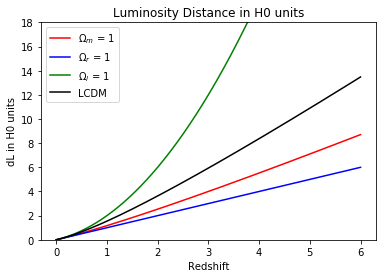

In [42]:
#Plotting the luminosity distance in inverse H0 units: H0dL
dl_m=[]
dl_lcdm=[]
dl_l=[]
dl_r=[]

for i in z:
    dl_m.append((1+i)*r(i,omega_m=1))
    dl_l.append((1+i)*r(i,omega_l=1))
    dl_r.append((1+i)*r(i,omega_r=1))
    dl_lcdm.append((1+i)*r(i,omega_m=0.3,omega_l=0.7))
    
plt.plot(z, dl_m, c='r', label = '$\Omega_{m}$ = 1')
plt.plot(z, dl_r, c='b', label = '$\Omega_{r}$ = 1')
plt.plot(z, dl_l, c='g', label = '$\Omega_{l}$ = 1')
plt.plot(z, dl_lcdm, c='k', label = 'LCDM')
plt.title('Luminosity Distance in H0 units')
plt.ylim(0,18)
plt.legend(loc='upper left')
plt.xlabel('Redshift')
plt.ylabel('dL in H0 units')
plt.show()

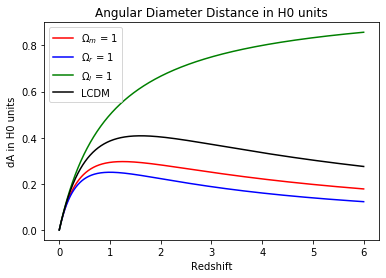

In [43]:
#Plotting Diameter distance in H0 units: H0dA

da_m=[]
da_lcdm=[]
da_l=[]
da_r=[]

for i in z:
    da_m.append(r(i,omega_m=1)/(1+i))
    da_l.append(r(i,omega_l=1)/(1+i))
    da_r.append(r(i,omega_r=1)/(1+i))
    da_lcdm.append(r(i,omega_m=0.3,omega_l=0.7)/(1+i))
    
plt.plot(z, da_m, c='r', label = '$\Omega_{m}$ = 1')
plt.plot(z, da_r, c='b', label = '$\Omega_{r}$ = 1')
plt.plot(z, da_l, c='g', label = '$\Omega_{l}$ = 1')
plt.plot(z, da_lcdm, c='k', label = 'LCDM')
plt.title('Angular Diameter Distance in H0 units')
plt.legend(loc='upper left')
plt.xlabel('Redshift')
plt.ylabel('dA in H0 units')
plt.show()